In [1]:
# Importing the necessary libraries
import os
import cv2
import imghdr
import numpy as np
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, GlobalAveragePooling2D, Dropout
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, confusion_matrix
from matplotlib import pyplot as plt
from tensorflow.keras.applications import MobileNetV2

In [2]:
data_dir = 'Data'
image_exts = ['jpeg', 'jpg', 'bmp', 'png']

In [3]:
# Remove images with unsupported extensions
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))

In [4]:
data = tf.keras.utils.image_dataset_from_directory('Data')

Found 1557 files belonging to 10 classes.


In [5]:
data_iterator = data.as_numpy_iterator()

In [6]:
batch = next(data_iterator)

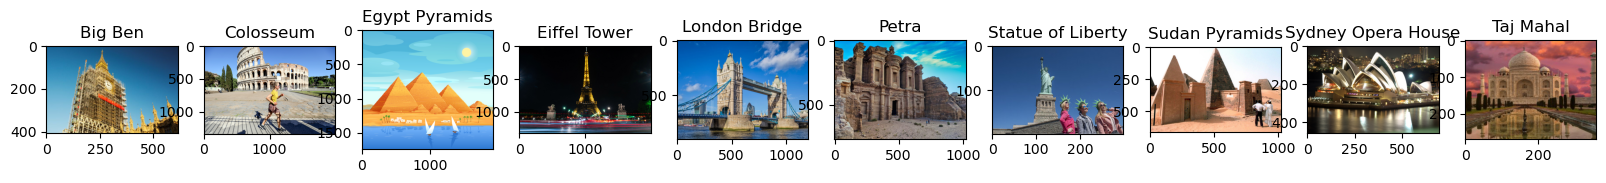

In [7]:
fig, ax = plt.subplots(ncols=10, figsize=(20,20))
class_names = data.class_names
for idx, folder in enumerate(class_names):
    folder_path = os.path.join(data_dir, folder)
    image_files = os.listdir(folder_path)
    image_path = os.path.join(folder_path, image_files[0])  
    img = plt.imread(image_path)
    ax[idx].imshow(img)
    ax[idx].set_title(folder)

In [8]:
# Defining data augmentation transformations
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal"),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
    tf.keras.layers.experimental.preprocessing.RandomZoom(0.2),
    tf.keras.layers.experimental.preprocessing.RandomContrast(0.2)
])

In [9]:
data = data.map(lambda x, y: (x / 255, y))

In [10]:
# Splitting the dataset into training and validation
train_size = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(160, 160),
    batch_size=160)
val_size = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(160, 160),
    batch_size=32)


Found 1557 files belonging to 10 classes.
Using 1246 files for training.
Found 1557 files belonging to 10 classes.
Using 311 files for validation.


In [11]:
# Applying data augmentation to the training dataset
train_size = train_size.map(lambda x, y: (data_augmentation(x, training=True), y))

In [12]:
# Assigning Test dataset
test_dataset = val_size.take(5)
val_size = val_size.skip(5)

In [13]:
# Pre-trained MobileNetV2 model
base_model = MobileNetV2(include_top=False, input_shape=(160, 160, 3))

# Freeze the layers of the pre-trained model
for layer in base_model.layers:
    layer.trainable = False

# Create a new model on top of the pre-trained base
model = Sequential([
    base_model,
    Flatten(),
    Dense(512, activation='relu'),
    Dense(512, activation='relu'),
    Dense(len(class_names), activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_size, epochs=100, validation_data=val_size)


Epoch 1/100
8/8 [==============================] - 66s 5s/step - loss: 29.6694 - accuracy: 0.1549 - val_loss: 23.4602 - val_accuracy: 0.2185
Epoch 2/100
8/8 [==============================] - 42s 4s/step - loss: 11.3957 - accuracy: 0.2071 - val_loss: 4.6425 - val_accuracy: 0.1921
Epoch 3/100
8/8 [==============================] - 48s 4s/step - loss: 2.8210 - accuracy: 0.3652 - val_loss: 2.0535 - val_accuracy: 0.5099
Epoch 4/100
8/8 [==============================] - 47s 4s/step - loss: 1.6167 - accuracy: 0.5016 - val_loss: 1.2822 - val_accuracy: 0.4967
Epoch 5/100
8/8 [==============================] - 46s 4s/step - loss: 1.1637 - accuracy: 0.6236 - val_loss: 1.1175 - val_accuracy: 0.5894
Epoch 6/100
8/8 [==============================] - 49s 4s/step - loss: 0.9790 - accuracy: 0.6709 - val_loss: 0.9734 - val_accuracy: 0.6755
Epoch 7/100
8/8 [==============================] - 38s 3s/step - loss: 0.8620 - accuracy: 0.7183 - val_loss: 1.1066 - val_accuracy: 0.6291
Epoch 8/100
8/8 [=======

8/8 [==============================] - 43s 3s/step - loss: 0.2515 - accuracy: 0.9181 - val_loss: 0.8465 - val_accuracy: 0.7550
Epoch 60/100
8/8 [==============================] - 47s 4s/step - loss: 0.2137 - accuracy: 0.9302 - val_loss: 0.7559 - val_accuracy: 0.7748
Epoch 61/100
8/8 [==============================] - 47s 4s/step - loss: 0.2080 - accuracy: 0.9270 - val_loss: 0.5992 - val_accuracy: 0.8543
Epoch 62/100
8/8 [==============================] - 47s 4s/step - loss: 0.2129 - accuracy: 0.9157 - val_loss: 0.7421 - val_accuracy: 0.7947
Epoch 63/100
8/8 [==============================] - 45s 3s/step - loss: 0.1837 - accuracy: 0.9358 - val_loss: 0.7057 - val_accuracy: 0.7947
Epoch 64/100
8/8 [==============================] - 44s 4s/step - loss: 0.2126 - accuracy: 0.9278 - val_loss: 0.8571 - val_accuracy: 0.7550
Epoch 65/100
8/8 [==============================] - 47s 4s/step - loss: 0.1697 - accuracy: 0.9478 - val_loss: 0.8884 - val_accuracy: 0.7616
Epoch 66/100
8/8 [===============

In [14]:
# Getting the true labels and the predicted labels of test data
y_true = []
y_pred = []
for images, labels in test_dataset:
  predictions = model.predict(images)
  y_true.extend(labels.numpy())
  y_pred.extend(np.argmax(predictions, axis=1))

# Print the classification report
print(classification_report(y_true, y_pred, target_names=class_names))


1/1 [==============================] - 0s 431ms/step
                    precision    recall  f1-score   support

           Big Ben       0.85      0.69      0.76        16
         Colosseum       0.44      1.00      0.61        11
    Egypt Pyramids       0.80      0.50      0.62        16
      Eiffel Tower       0.88      0.93      0.90        15
     London Bridge       0.79      0.58      0.67        19
             Petra       0.95      0.90      0.92        20
 Statue of Liberty       1.00      0.57      0.73         7
    Sudan Pyramids       0.74      0.83      0.78        24
Sydney Opera House       0.82      0.95      0.88        19
         Taj Mahal       0.80      0.62      0.70        13

          accuracy                           0.77       160
         macro avg       0.81      0.76      0.76       160
      weighted avg       0.81      0.77      0.77       160



<Figure size 2000x1000 with 0 Axes>

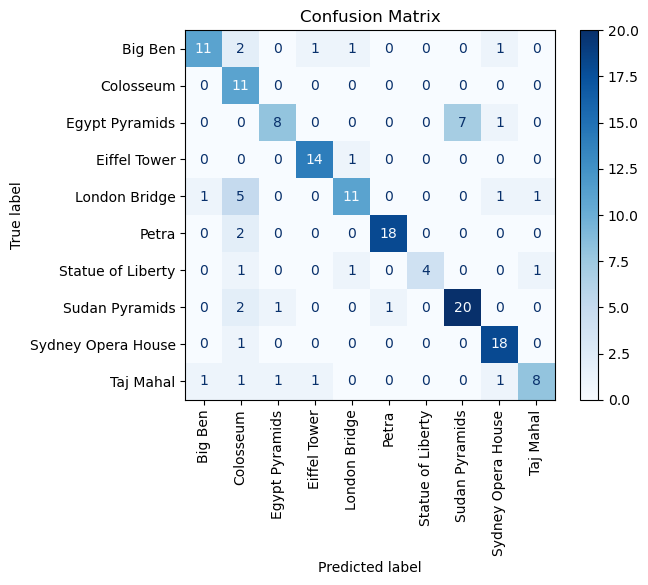

In [15]:
# Calculating the confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Displaying the confusion matrix 
plt.figure(dpi=200, figsize=(10, 5))
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues, xticks_rotation='vertical')  
plt.title('Confusion Matrix')
plt.show()

1/1 [==============================] - 1s 869ms/step


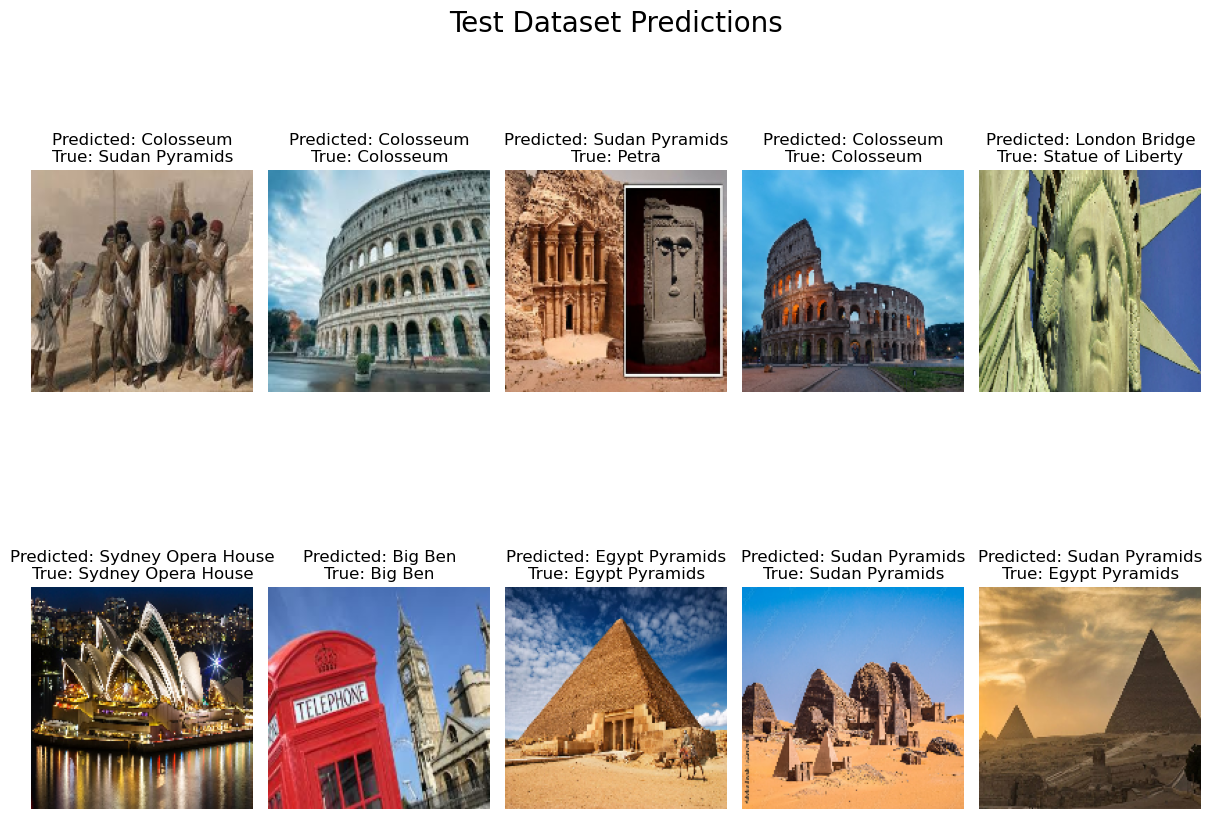

In [16]:
# Getting a batch of images from the test dataset
sample_images, sample_labels = next(iter(test_dataset))
sample_predictions = model.predict(sample_images)

# Mapping the predicted labels to class names
predicted_labels = [class_names[np.argmax(prediction)] for prediction in sample_predictions]

# Creating a figure with a grid of subplots for visualization
fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(12, 10))

# Loop through the subplots
for i in range(2):
    for j in range(5):
        idx = i * 5 + j  
        
        # Preprocess and normalize the image
        image = sample_images[idx] / 255.0
        ax[i, j].set_title(f"Predicted: {predicted_labels[idx]}\nTrue: {class_names[sample_labels[idx]]}")
        ax[i, j].imshow(image)
        ax[i, j].axis("off")

# Increase the resolution of the images
plt.rcParams["figure.dpi"] = 300

# Display the images
plt.tight_layout()
plt.suptitle("Test Dataset Predictions", fontsize=20)
plt.show()
